## 1. Importing  Necessary Libraries

In [1]:
# # !pip install --upgrade matplotlib
!pip install plotly
!pip install imblearn

     |████████████████████████████████| 15.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 72.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# import all libraries and dependencies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from plotly.subplots import make_subplots

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_colwidth', None) 

# default figure size
plt.rcParams["figure.figsize"] = (15, 10)


from scipy.stats import shapiro

from pandas import factorize

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import collections

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report

## 2. Reading & Understanding the Data


In [3]:
url  = "https://raw.githubusercontent.com/Latentview/Hackathon/main/Credit card fraud detection - updated Dataset.csv"
url = url.replace(" ", "%20") # Replacing space in url with %20 as it corresponds to whitespace in URL-encoding

df = pd.read_csv(url)
ndf = df
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0       6/21/2020 12:14  2291163933867240   
1           1       6/21/2020 12:14  3573030041201290   
2           2       6/21/2020 12:14  3598215285024750   
3           3       6/21/2020 12:15  3591919803438420   
4           4       6/21/2020 12:15  3526826139003040   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer   3/19/1968   
1  40.3207 -110.4360       302  Sales professional, IT   1/17/1990   
2  40.6729  -73.5365     34496       Librarian, public  10/21/1970   
3  28.5697  -80.8191     54767            Set designer   7/25/1987   
4  44.2529  -85.0170      1126      Furniture designer    7/6/1955   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [4]:
df.shape

(61421, 23)

In [5]:
df.info() # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61421 entries, 0 to 61420
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             61421 non-null  int64  
 1   trans_date_trans_time  61421 non-null  object 
 2   cc_num                 61421 non-null  int64  
 3   merchant               61421 non-null  object 
 4   category               61421 non-null  object 
 5   amt                    61421 non-null  float64
 6   first                  61421 non-null  object 
 7   last                   61421 non-null  object 
 8   gender                 61421 non-null  object 
 9   street                 61421 non-null  object 
 10  city                   61421 non-null  object 
 11  state                  61421 non-null  object 
 12  zip                    61421 non-null  int64  
 13  lat                    61421 non-null  float64
 14  long                   61421 non-null  float64
 15  ci

From above we can conclude that there aren't any null values in the dataset

### 2.1 Checking for null values

In [6]:
# Checking for missing values in the dataset
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Unnamed: 0    0.0
zip           0.0
merch_long    0.0
merch_lat     0.0
unix_time     0.0
dtype: float64

In [7]:
df.describe() # getting the summary statistics of the dataset

Unnamed: 0        cc_num           amt           zip           lat  \
count  61421.000000  6.142100e+04  61421.000000  61421.000000  61421.000000   
mean   30710.000000  4.137167e+17     69.272317  48668.229400     38.547058   
std    17730.859779  1.304008e+18    145.342990  26818.913191      5.075711   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    15355.000000  1.800365e+14      9.700000  26237.000000     34.668900   
50%    30710.000000  3.518759e+15     47.140000  48088.000000     39.376400   
75%    46065.000000  4.629452e+15     82.850000  72011.000000     42.015800   
max    61420.000000  4.992346e+18  13149.150000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  61421.000000  6.142100e+04  6.142100e+04  61421.000000  61421.000000   
mean     -90.128079  8.969842e+04  1.372711e+09     38.543489    -90.127338   
std       13.658571  3.031401e+05  5.384621e+05      5.109731     13.670960   
min     -165.672300  2.300000e+01  1.371817e+09     19.042320   -166.646251   
25%      -96.786900  7.410000e+02  1.372263e+09     34.753414    -96.823491   
50%      -87.410100  2.408000e+03  1.372676e+09     39.378142    -87.355238   
75%      -80.158000  1.968500e+04  1.373153e+09     41.978241    -80.212543   
max      -67.950300  2.906700e+06  1.373657e+09     66.669356    -66.955602   

           is_fraud  
count  61421.000000  
mean       0.004135  
std        0.064174  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### 2.2 Checking for duplicate rows

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(0, 23)

We can see that there are no duplicate rows.

## 3. Cleaning the Data

### 3.1 Dropping unnecessary column

In [9]:
df = df.drop(['Unnamed: 0', 'street', 'first', 'last', 'trans_num'],axis=1)
df.head()

trans_date_trans_time            cc_num  \
0       6/21/2020 12:14  2291163933867240   
1       6/21/2020 12:14  3573030041201290   
2       6/21/2020 12:14  3598215285024750   
3       6/21/2020 12:15  3591919803438420   
4       6/21/2020 12:15  3526826139003040   

                               merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer   3/19/1968  1371816865  33.986391  -81.200714   
1  Sales professional, IT   1/17/1990  1371816873  39.450498 -109.960431   
2       Librarian, public  10/21/1970  1371816893  40.495810  -74.196111   
3            Set designer   7/25/1987  1371816915  28.812398  -80.883061   
4      Furniture designer    7/6/1955  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [10]:
df.shape

(61421, 18)

### 3.2 Converting into appropiate datatype

In [11]:
df['dob'] = df['dob'].astype('datetime64[ns]')
# df['dob'] = pd.to_datetime(df['dob'], format='%m%d%y')
df['is_fraud'] = pd.to_numeric(df['is_fraud'])
df['Date_time'] = df['trans_date_trans_time'].astype('datetime64[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61421 entries, 0 to 61420
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  61421 non-null  object        
 1   cc_num                 61421 non-null  int64         
 2   merchant               61421 non-null  object        
 3   category               61421 non-null  object        
 4   amt                    61421 non-null  float64       
 5   gender                 61421 non-null  object        
 6   city                   61421 non-null  object        
 7   state                  61421 non-null  object        
 8   zip                    61421 non-null  int64         
 9   lat                    61421 non-null  float64       
 10  long                   61421 non-null  float64       
 11  city_pop               61421 non-null  int64         
 12  job                    61421 non-null  object        
 13  d

### 3.3 Separating Date and Time

In [13]:
df['Date'] = pd.to_datetime(df['Date_time']).dt.date
df['Time'] = pd.to_datetime(df['Date_time']).dt.time
df['hour']  =  df['Date_time'].dt.hour

In [14]:
# df['is_fraud'] = pd.to_numeric(df['is_fraud'])

In [15]:
df.dtypes

trans_date_trans_time            object
cc_num                            int64
merchant                         object
category                         object
amt                             float64
gender                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
Date_time                datetime64[ns]
Date                             object
Time                             object
hour                              int64
dtype: object

In [16]:
df.head()

trans_date_trans_time            cc_num  \
0       6/21/2020 12:14  2291163933867240   
1       6/21/2020 12:14  3573030041201290   
2       6/21/2020 12:14  3598215285024750   
3       6/21/2020 12:15  3591919803438420   
4       6/21/2020 12:15  3526826139003040   

                               merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job        dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer 1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT 1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public 1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer 1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer 1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud           Date_time        Date      Time  hour  
0         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
1         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
2         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
3         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  
4         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12

In [17]:
# dropping 'trans_date_trans_time' column
df = df.drop('trans_date_trans_time', axis=1)

In [18]:
df.head()

cc_num                              merchant        category  \
0  2291163933867240                 fraud_Kirlin and Sons   personal_care   
1  3573030041201290                  fraud_Sporer-Keebler   personal_care   
2  3598215285024750  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  3591919803438420                     fraud_Haley Group        misc_pos   
4  3526826139003040                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job        dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer 1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT 1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public 1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer 1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer 1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud           Date_time        Date      Time  hour  
0         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
1         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
2         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  
3         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  
4         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12

Adding a age column

In [19]:
now = pd.Timestamp('now')
# df['dob'] = pd.to_datetime(df['dob'], format='%m%d%y')    # 1
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')    # 3

In [20]:
df.drop('dob', axis=1)

cc_num                              merchant        category  \
0      2291163933867240                 fraud_Kirlin and Sons   personal_care   
1      3573030041201290                  fraud_Sporer-Keebler   personal_care   
2      3598215285024750  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3      3591919803438420                     fraud_Haley Group        misc_pos   
4      3526826139003040                 fraud_Johnston-Casper          travel   
...                 ...                                   ...             ...   
61416  3551217896304740               fraud_Bahringer-Streich     food_dining   
61417      676102124465   fraud_Walter, Hettinger and Kessler   personal_care   
61418    30197398657930                  fraud_Jast-McDermott    shopping_pos   
61419   379897244598068                    fraud_Emmerich-Rau   personal_care   
61420   376445266762684              fraud_Altenwerth-Kilback            home   

         amt gender          city state    zip      lat      long  city_pop  \
0       2.86      M      Columbia    SC  29209  33.9659  -80.9355    333497   
1      29.84      F       Altonah    UT  84002  40.3207 -110.4360       302   
2      41.28      F      Bellmore    NY  11710  40.6729  -73.5365     34496   
3      60.05      M    Titusville    FL  32780  28.5697  -80.8191     54767   
4       3.19      M      Falmouth    MI  49632  44.2529  -85.0170      1126   
...      ...    ...           ...   ...    ...      ...       ...       ...   
61416  78.28      F   Tupper Lake    NY  12986  44.2320  -74.4905      6120   
61417  28.88      F          Napa    CA  94558  38.4549 -122.2564     94014   
61418   2.36      F     Creedmoor    NC  27522  36.1124  -78.6476     12335   
61419  17.18      M  Pewee Valley    KY  40056  38.3039  -85.4834      3263   
61420  12.99      F    Sutherland    NE  69165  41.1558 -101.1360      1789   

                           job   unix_time  merch_lat  merch_long  is_fraud  \
0          Mechanical engineer  1371816865  33.986391  -81.200714         0   
1       Sales professional, IT  1371816873  39.450498 -109.960431         0   
2            Librarian, public  1371816893  40.495810  -74.196111         0   
3                 Set designer  1371816915  28.812398  -80.883061         0   
4           Furniture designer  1371816917  44.959148  -85.884734         0   
...                        ...         ...        ...         ...       ...   
61416  Chartered loss adjuster  1373657448  45.064273  -73.892743         0   
61417            Airline pilot  1373657460  39.333584 -122.266391         0   
61418   Chief Strategy Officer  1373657463  36.799299  -78.725859         0   
61419            Stage manager  1373657465  38.173806  -84.962561         0   
61420         Insurance broker  1373657475  41.795594 -100.550790         0   

                Date_time        Date      Time  hour   age  
0     2020-06-21 12:14:00  2020-06-21  12:14:00    12  54.0  
1     2020-06-21 12:14:00  2020-06-21  12:14:00    12  32.0  
2     2020-06-21 12:14:00  2020-06-21  12:14:00    12  52.0  
3     2020-06-21 12:15:00  2020-06-21  12:15:00    12  35.0  
4     2020-06-21 12:15:00  2020-06-21  12:15:00    12  67.0  
...                   ...         ...       ...   ...   ...  
61416 2020-07-12 19:30:00  2020-07-12  19:30:00    19  46.0  
61417 2020-07-12 19:31:00  2020-07-12  19:31:00    19  37.0  
61418 2020-07-12 19:31:00  2020-07-12  19:31:00    19  35.0  
61419 2020-07-12 19:31:00  2020-07-12  19:31:00    19  92.0  
61420 2020-07-12 19:31:00  2020-07-12  19:31:00    19  40.0  

[61421 rows x 21 columns]

In [21]:
df.head()

cc_num                              merchant        category  \
0  2291163933867240                 fraud_Kirlin and Sons   personal_care   
1  3573030041201290                  fraud_Sporer-Keebler   personal_care   
2  3598215285024750  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  3591919803438420                     fraud_Haley Group        misc_pos   
4  3526826139003040                 fraud_Johnston-Casper          travel   

     amt gender        city state    zip      lat      long  city_pop  \
0   2.86      M    Columbia    SC  29209  33.9659  -80.9355    333497   
1  29.84      F     Altonah    UT  84002  40.3207 -110.4360       302   
2  41.28      F    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  60.05      M  Titusville    FL  32780  28.5697  -80.8191     54767   
4   3.19      M    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job        dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer 1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT 1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public 1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer 1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer 1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud           Date_time        Date      Time  hour   age  
0         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  54.0  
1         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  32.0  
2         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  52.0  
3         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  35.0  
4         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  67.0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61421 entries, 0 to 61420
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cc_num      61421 non-null  int64         
 1   merchant    61421 non-null  object        
 2   category    61421 non-null  object        
 3   amt         61421 non-null  float64       
 4   gender      61421 non-null  object        
 5   city        61421 non-null  object        
 6   state       61421 non-null  object        
 7   zip         61421 non-null  int64         
 8   lat         61421 non-null  float64       
 9   long        61421 non-null  float64       
 10  city_pop    61421 non-null  int64         
 11  job         61421 non-null  object        
 12  dob         61421 non-null  datetime64[ns]
 13  unix_time   61421 non-null  int64         
 14  merch_lat   61421 non-null  float64       
 15  merch_long  61421 non-null  float64       
 16  is_fraud    61421 non-

Separating numeircal and categorical column name

In [23]:
num_col = ['cc_num','amt', 'zip', 'lat', 'long', 'city_pop', 'hour','age','unix_time']
num_col

['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'hour', 'age', 'unix_time']

In [24]:
cat_col = ['merchant','category', 'gender','city', 'state', 'job', 'is_fraud']
# df[cat_col] = df[cat_col].astype(str)

In [25]:
df.head().T

0                       1  \
cc_num           2291163933867240        3573030041201290   
merchant    fraud_Kirlin and Sons    fraud_Sporer-Keebler   
category            personal_care           personal_care   
amt                          2.86                   29.84   
gender                          M                       F   
city                     Columbia                 Altonah   
state                          SC                      UT   
zip                         29209                   84002   
lat                       33.9659                 40.3207   
long                     -80.9355                -110.436   
city_pop                   333497                     302   
job           Mechanical engineer  Sales professional, IT   
dob           1968-03-19 00:00:00     1990-01-17 00:00:00   
unix_time              1371816865              1371816873   
merch_lat               33.986391               39.450498   
merch_long             -81.200714             -109.960431   
is_fraud                        0                       0   
Date_time     2020-06-21 12:14:00     2020-06-21 12:14:00   
Date                   2020-06-21              2020-06-21   
Time                     12:14:00                12:14:00   
hour                           12                      12   
age                          54.0                    32.0   

                                               2                    3  \
cc_num                          3598215285024750     3591919803438420   
merchant    fraud_Swaniawski, Nitzsche and Welch    fraud_Haley Group   
category                          health_fitness             misc_pos   
amt                                        41.28                60.05   
gender                                         F                    M   
city                                    Bellmore           Titusville   
state                                         NY                   FL   
zip                                        11710                32780   
lat                                      40.6729              28.5697   
long                                    -73.5365             -80.8191   
city_pop                                   34496                54767   
job                            Librarian, public         Set designer   
dob                          1970-10-21 00:00:00  1987-07-25 00:00:00   
unix_time                             1371816893           1371816915   
merch_lat                               40.49581            28.812398   
merch_long                            -74.196111           -80.883061   
is_fraud                                       0                    0   
Date_time                    2020-06-21 12:14:00  2020-06-21 12:15:00   
Date                                  2020-06-21           2020-06-21   
Time                                    12:14:00             12:15:00   
hour                                          12                   12   
age                                         52.0                 35.0   

                                4  
cc_num           3526826139003040  
merchant    fraud_Johnston-Casper  
category                   travel  
amt                          3.19  
gender                          M  
city                     Falmouth  
state                          MI  
zip                         49632  
lat                       44.2529  
long                      -85.017  
city_pop                     1126  
job            Furniture designer  
dob           1955-07-06 00:00:00  
unix_time              1371816917  
merch_lat               44.959148  
merch_long             -85.884734  
is_fraud                        0  
Date_time     2020-06-21 12:15:00  
Date                   2020-06-21  
Time                     12:15:00  
hour                           12  
age                          67.0

## 4. Exploratory Data Analysis

### 4.1 Distribution Checking

In [26]:
len(num_col)

9

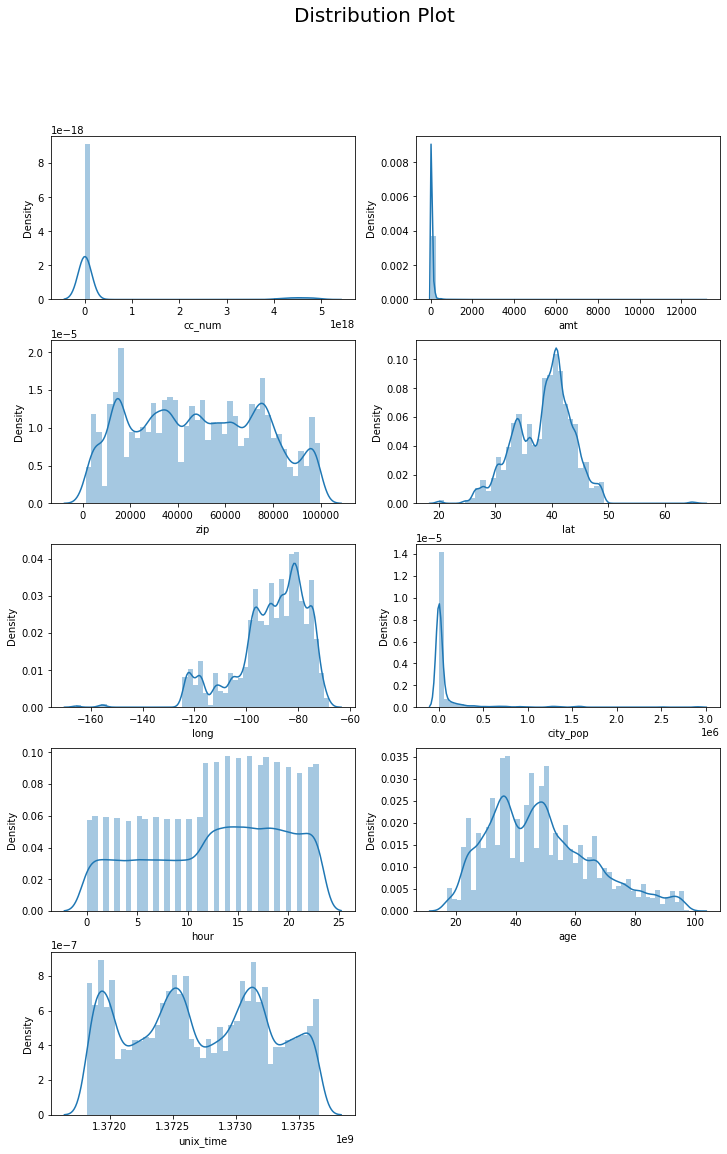

In [27]:
# Plotting distribution curve
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,18))

for name, ax in zip(num_col, axes.flatten()):
    sns.distplot(df[name], ax=ax)

fig.suptitle("Distribution Plot", fontsize=20)
fig.subplots_adjust(hspace=0.25)
fig.delaxes(axes[4,1])

The column **lat** looks lie it could be normally distributed. Lte's check it formally using Shapiro-Wilk test

**In Shapiro-Wilk Normality Test :**

H0 : The data are normally distributed

In [28]:
for i in range(len(num_col)):
    stat,p = shapiro(df[num_col[i]])
    print(num_col[i])
    print('P_value =  ' , (p))
    print("*******************************")

cc_num
P_value =   0.0
*******************************
amt
P_value =   0.0
*******************************
zip
P_value =   0.0
*******************************
lat
P_value =   0.0
*******************************
long
P_value =   0.0
*******************************
city_pop
P_value =   0.0
*******************************
hour
P_value =   0.0
*******************************
age
P_value =   0.0
*******************************
unix_time
P_value =   0.0
*******************************


According to the P_value obtained from the Shapiro test (p_value < 5%), 
we reject our null hypothesis 

(H0) --> So the numerical fields do not follow the normal distribution. 

Thus, our numerical column are not **normally distributed**

### 4.2 Outlier Detection

In [29]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# -------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# -------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# -------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlire replace with upper bound - {}' .format(col)) 
    
# -------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlire replace with lower bound - {}' .format(col)) 


In [30]:
def find_outliers(df, col):
    
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    IQR = q3 - q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = df.index[(df[col]<lower_bound) | (df[col]>upper_bound)]
    
#     Replcaing outliers with median
#     df_median[col] = np.where(((df[col]<lower_bound) | (df[col]>upper_bound)), df[col].median(),df[col]) 

    if len(ls) > 0:
        print("There are ",len(ls), "Outliers present in column : ", col)
    return(ls)

In [31]:
outliers = []
for col in num_col:
    outliers.extend(find_outliers(df, col))
print("Total number of outliers is ",len(set(outliers)))

There are  5579 Outliers present in column :  cc_num
There are  3078 Outliers present in column :  amt
There are  205 Outliers present in column :  lat
There are  2246 Outliers present in column :  long
There are  11592 Outliers present in column :  city_pop
There are  310 Outliers present in column :  age
Total number of outliers is  19795


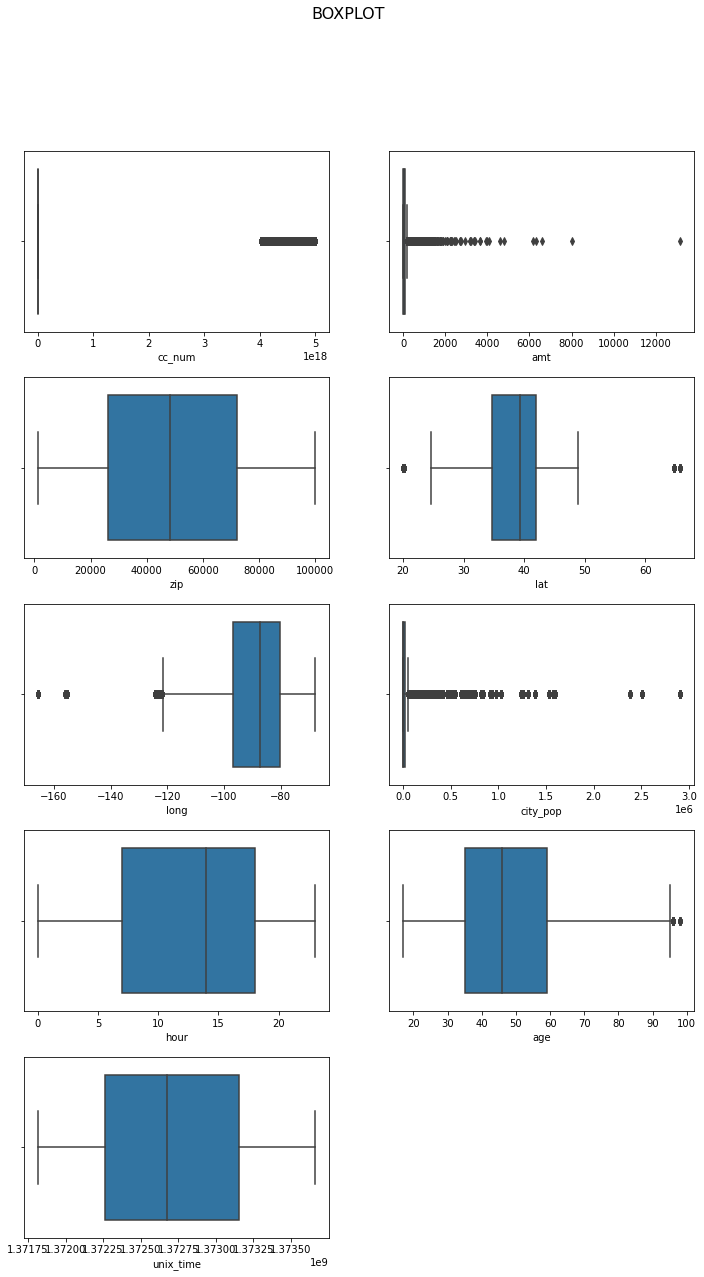

In [32]:
# Plotting boxplot
rows = 5
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,20))
# plt.figure(figsize=(10,10))
for name, ax in zip(num_col, axes.flatten()):
    sns.boxplot(df[name], ax=ax)
fig.suptitle("BOXPLOT", fontsize=16)
fig.subplots_adjust(hspace=0.25)
fig.delaxes(axes[4,1])

### 4.2 Handling outliers 

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [34]:
for i in range(len(num_col)):
    print("IQR => {}: {}".format(num_col[i],(outlier_detect(df[num_col],num_col[i]).shape[0])))

IQR => cc_num: 5579
IQR => amt: 3078
IQR => zip: 0
IQR => lat: 205
IQR => long: 2246
IQR => city_pop: 11592
IQR => hour: 0
IQR => age: 310
IQR => unix_time: 0


In [35]:
outlier = []
for i in range(len(num_col)):
    if outlier_detect(df[num_col],num_col[i]).shape[0] !=0:
        outlier.append(num_col[i])
outlier

['cc_num', 'amt', 'lat', 'long', 'city_pop', 'age']

#### 4.2.1 by replacing outliers with upper and lower bound

In [36]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i]) 
    
print("\n*******************************************\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlire replace with upper bound - cc_num
outlire replace with upper bound - amt
outlire replace with upper bound - lat
outlire replace with upper bound - long
outlire replace with upper bound - city_pop
outlire replace with upper bound - age

*******************************************

outlire replace with lower bound - cc_num
outlire replace with lower bound - amt
outlire replace with lower bound - lat
outlire replace with lower bound - long
outlire replace with lower bound - city_pop
outlire replace with lower bound - age


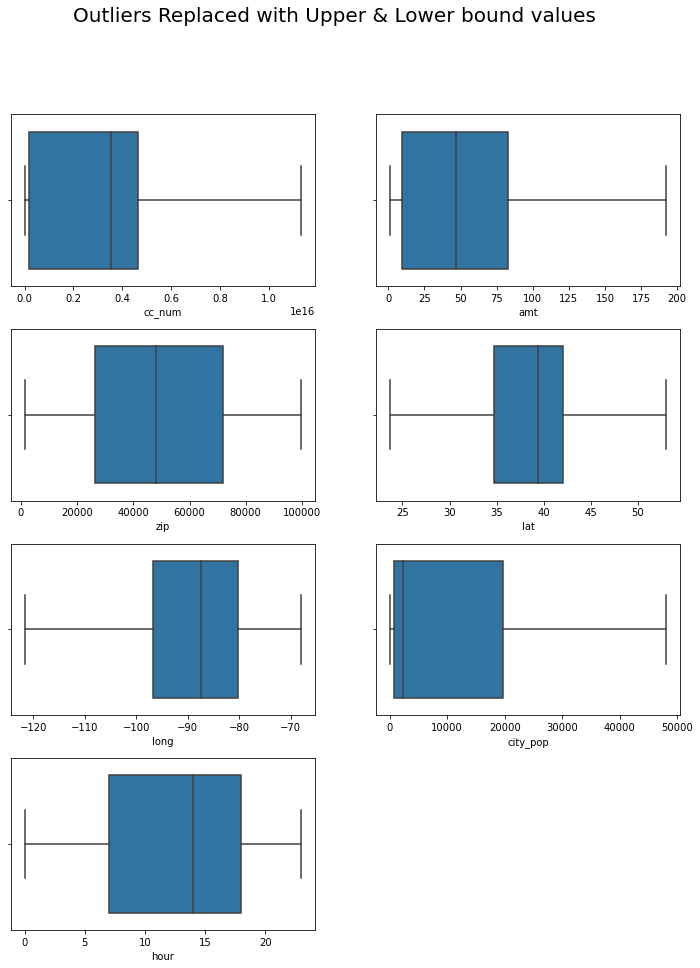

In [37]:
# Plotting boxplot
rows = 4
cols = 2
fig, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(12,15))
# plt.figure(figsize=(10,10))
for name, ax in zip(num_col, axes.flatten()):
    sns.boxplot(df[name], ax=ax)
fig.delaxes(axes[3,1])
fig.suptitle("Outliers Replaced with Upper & Lower bound values", fontsize=20)
fig.subplots_adjust(hspace=0.25)

We can see that now our data's distribution has improved

### 4.3 Checking for class imbalance

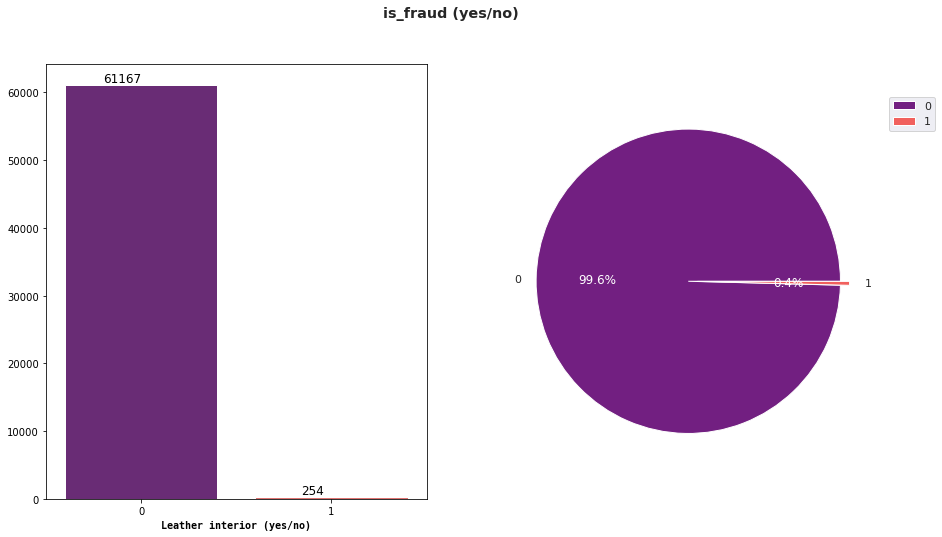

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['is_fraud'].value_counts().index
y=df['is_fraud'].value_counts().values.tolist()
data = df.groupby("is_fraud").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Leather interior (yes/no)', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['is_fraud'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('is_fraud (yes/no)',weight = 'bold')
plt.show()

As we can see that the classes are **extremely imbalanced** and we will have to deal with this problem potentially with upscaling; that way, we give our models a better chance of learning the small details which define potential stroke individuals.

In [39]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Date_time', 'Date', 'Time',
       'hour', 'age'],
      dtype='object')

### 4.4 Checking correlation of data 

In [40]:
df_corr = df.corr()
df_corr

cc_num       amt       zip       lat      long  city_pop  \
cc_num      1.000000  0.009584  0.033418 -0.032090 -0.031515  0.026419   
amt         0.009584  1.000000  0.001346  0.005341 -0.000049 -0.004525   
zip         0.033418  0.001346  1.000000 -0.120344 -0.926853  0.066992   
lat        -0.032090  0.005341 -0.120344  1.000000  0.000195 -0.289282   
long       -0.031515 -0.000049 -0.926853  0.000195  1.000000 -0.054690   
city_pop    0.026419 -0.004525  0.066992 -0.289282 -0.054690  1.000000   
unix_time  -0.002522  0.008787  0.003017  0.004362 -0.003762 -0.008999   
merch_lat  -0.036909  0.004866 -0.112947  0.989098 -0.005294 -0.283821   
merch_long -0.038070  0.000568 -0.909898 -0.001073  0.986792 -0.046479   
is_fraud    0.013229  0.114058 -0.015259 -0.000610  0.013055  0.008752   
hour        0.012614 -0.130892  0.006200 -0.017665 -0.001963  0.038486   
age        -0.025453 -0.032848  0.006984  0.043432 -0.020303 -0.126604   

            unix_time  merch_lat  merch_long  is_fraud      hour       age  
cc_num      -0.002522  -0.036909   -0.038070  0.013229  0.012614 -0.025453  
amt          0.008787   0.004866    0.000568  0.114058 -0.130892 -0.032848  
zip          0.003017  -0.112947   -0.909898 -0.015259  0.006200  0.006984  
lat          0.004362   0.989098   -0.001073 -0.000610 -0.017665  0.043432  
long        -0.003762  -0.005294    0.986792  0.013055 -0.001963 -0.020303  
city_pop    -0.008999  -0.283821   -0.046479  0.008752  0.038486 -0.126604  
unix_time    1.000000   0.004484   -0.004251  0.005121 -0.023456  0.005428  
merch_lat    0.004484   1.000000   -0.013588 -0.001095 -0.017671  0.047995  
merch_long  -0.004251  -0.013588    1.000000  0.013267  0.000122 -0.027036  
is_fraud     0.005121  -0.001095    0.013267  1.000000  0.003381  0.012608  
hour        -0.023456  -0.017671    0.000122  0.003381  1.000000 -0.177606  
age          0.005428   0.047995   -0.027036  0.012608 -0.177606  1.000000

<AxesSubplot:>

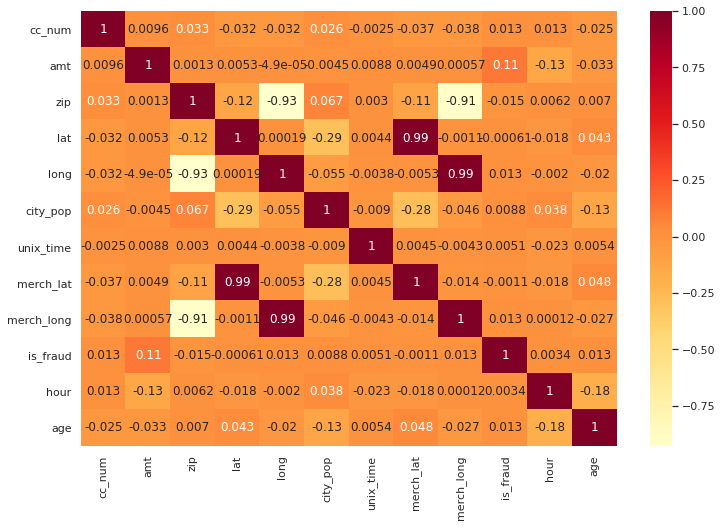

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap="YlOrRd", annot=True)

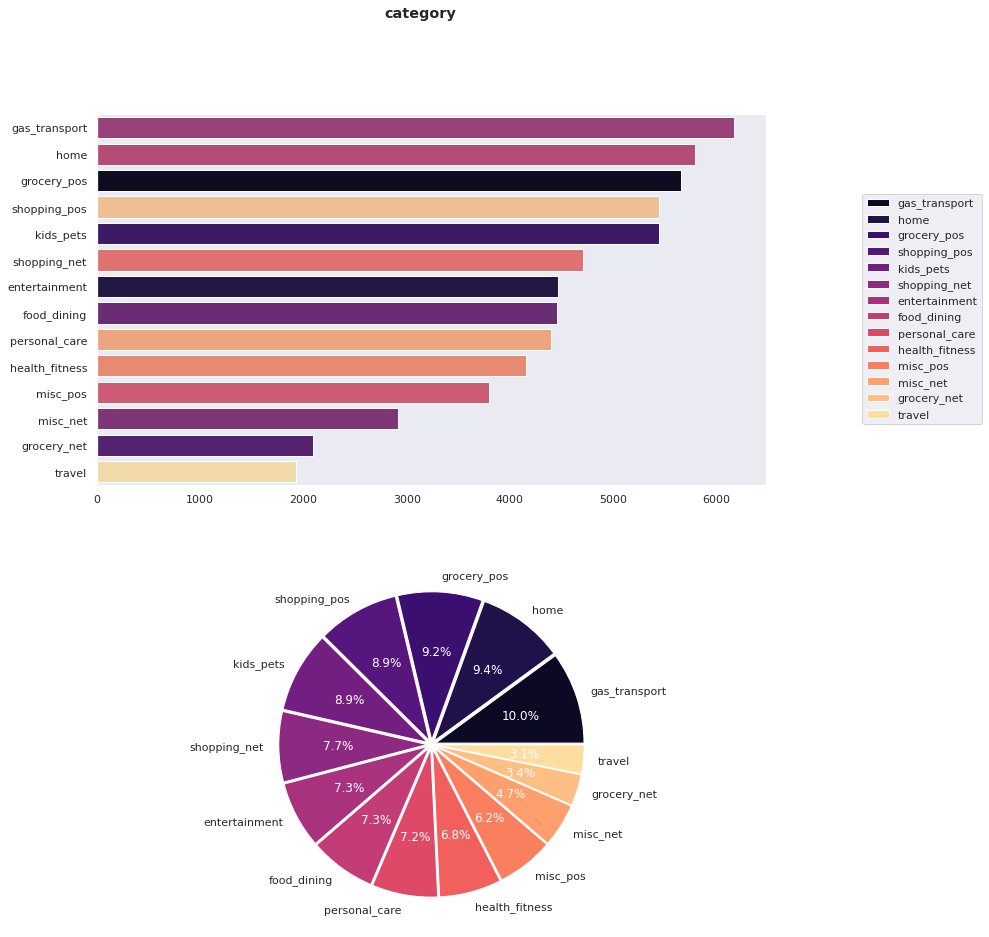

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(12,15))
x=df['category'].value_counts().index
y=df['category'].value_counts().values.tolist()

data = df.groupby("category").size()
sns.set(style="dark", color_codes=True)

pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 

xx = sns.barplot(x=y,y=x,palette=np.array(pal[::-1])[rank],ax = ax[0])

# for p in ax[0].patches:
#     width = p.get_width()
#     plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
#              '{:1.2f}'.format(width),
#              ha='center', va='center')
    
# ax[0].set_xlabel('category', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['category'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(2, 2))
plt.suptitle ('category',weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Amount vs Category')

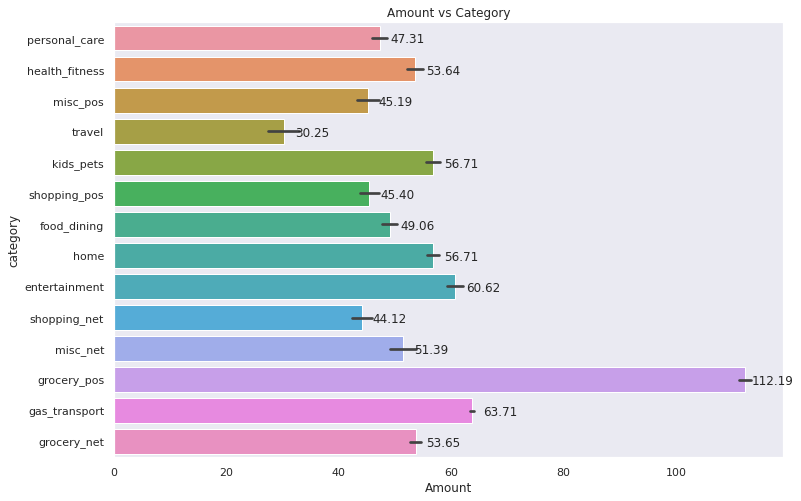

In [43]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df['amt'],y=df['category'])
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.xlabel("Amount")
plt.title("Amount vs Category")

**Q. Which category had more number of transaction amount and also find which gender spends more in health_fitness.**

We can cleary see that **grocery_pos** category has more number of transaction amount.

In [44]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Date_time', 'Date', 'Time',
       'hour', 'age'],
      dtype='object')

In [45]:
df['gender'].value_counts()

F    33733
M    27688
Name: gender, dtype: int64

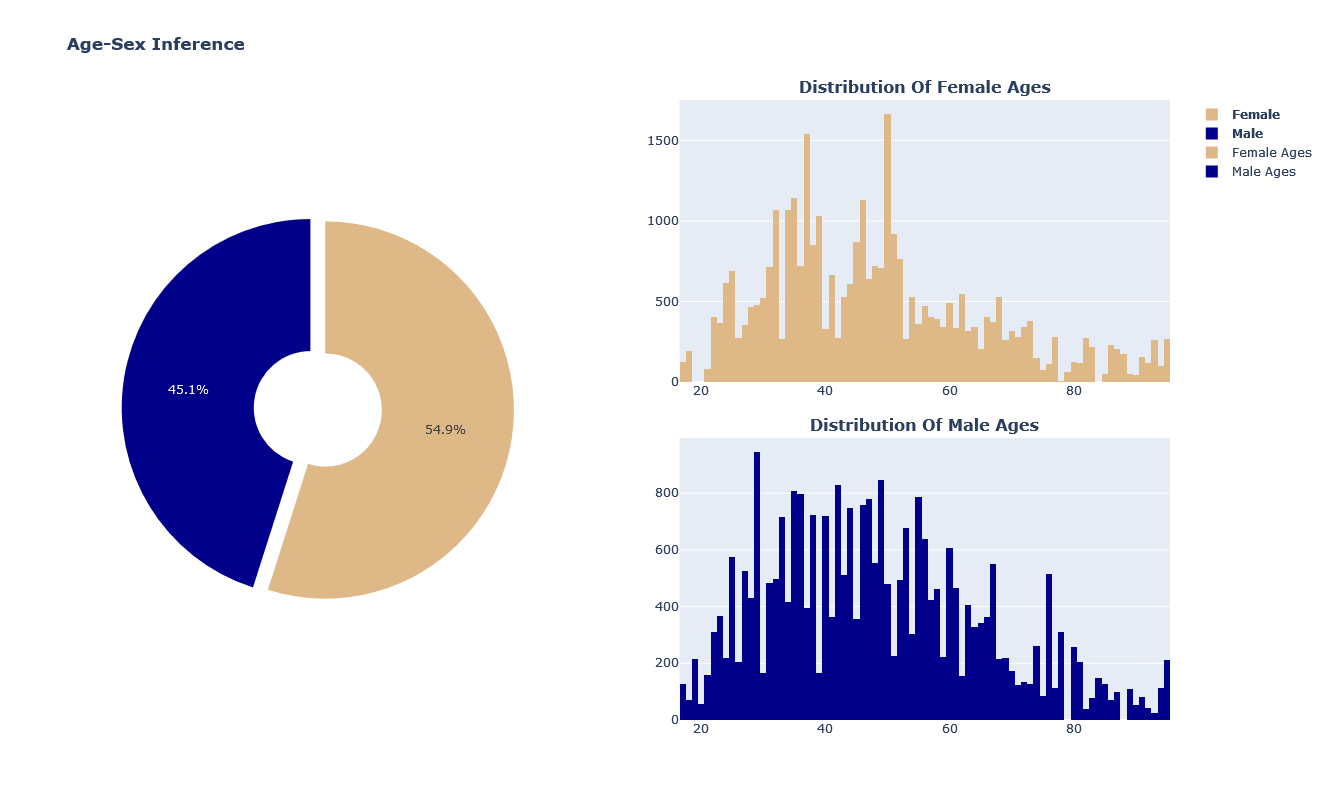

In [46]:
fig = make_subplots(
    rows=2, cols=2,subplot_titles=('','<b>Distribution Of Female Ages<b>','<b>Distribution Of Male Ages<b>'),
    vertical_spacing=0.09,
    specs=[[{"type": "pie","rowspan": 2},{"type": "histogram"}] ,[None,{"type": "histogram"}],]
)

fig.add_trace(
    go.Pie(values=df.gender.value_counts().values,labels=['<b>Female<b>','<b>Male<b>','<b>Other<b>'],hole=0.3,pull=[0,0.08,0.3],marker_colors=['burlywood','darkblue','green'],textposition='inside'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=df.query('gender=="F"').age,marker= dict(color='burlywood'),name='Female Ages'
    ),
    row=1, col=2
)


fig.add_trace(
    go.Histogram(
        x=df.query('gender=="M"').age,marker= dict(color='darkblue'),name='Male Ages'
    ),
    row=2, col=2
)


fig.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Age-Sex Inference<b>",
)

fig.show()

In [47]:
health = df[df['category'] == "health_fitness"]
df_male = health[health['gender'] == "M"]
df_female = health[health['gender'] == "F"]

Total_male = df_male['amt'].sum()
Total_female = df_female['amt'].sum()

print("Male spend health_fitness {}".format(Total_male))
print("Female spend health_fitness {}".format(Total_female))

Male spend health_fitness 109686.97
Female spend health_fitness 113420.79999999999


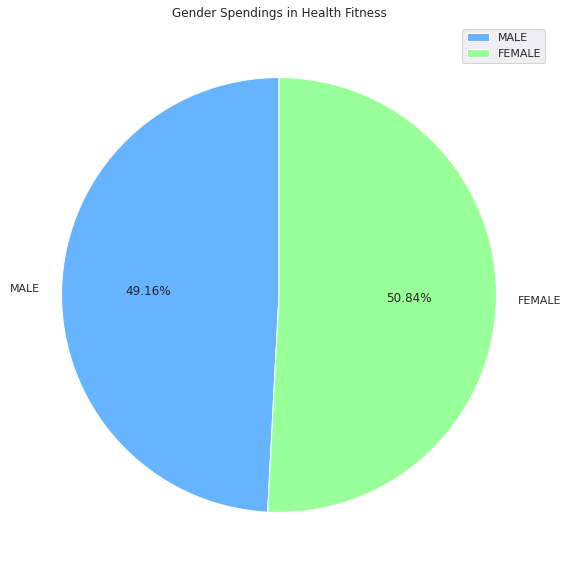

In [48]:
y = np.array([Total_male , Total_female])
labels = ["MALE" , "FEMALE"]
colors = ['#66b3ff','#99ff99','#ffcc99']
plt.pie(y , labels = labels , autopct='%.2f%%', colors=colors, startangle=90)
plt.title("Gender Spendings in Health Fitness")
plt.legend()
plt.show()

We can see that **Males** spends more in **health_fitness**

In [49]:
df.head()

cc_num                              merchant        category    amt  \
0  2.291164e+15                 fraud_Kirlin and Sons   personal_care   2.86   
1  3.573030e+15                  fraud_Sporer-Keebler   personal_care  29.84   
2  3.598215e+15  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28   
3  3.591920e+15                     fraud_Haley Group        misc_pos  60.05   
4  3.526826e+15                 fraud_Johnston-Casper          travel   3.19   

  gender        city state    zip      lat      long  city_pop  \
0      M    Columbia    SC  29209  33.9659  -80.9355   48101.0   
1      F     Altonah    UT  84002  40.3207 -110.4360     302.0   
2      F    Bellmore    NY  11710  40.6729  -73.5365   34496.0   
3      M  Titusville    FL  32780  28.5697  -80.8191   48101.0   
4      M    Falmouth    MI  49632  44.2529  -85.0170    1126.0   

                      job        dob   unix_time  merch_lat  merch_long  \
0     Mechanical engineer 1968-03-19  1371816865  33.986391  -81.200714   
1  Sales professional, IT 1990-01-17  1371816873  39.450498 -109.960431   
2       Librarian, public 1970-10-21  1371816893  40.495810  -74.196111   
3            Set designer 1987-07-25  1371816915  28.812398  -80.883061   
4      Furniture designer 1955-07-06  1371816917  44.959148  -85.884734   

   is_fraud           Date_time        Date      Time  hour   age  
0         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  54.0  
1         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  32.0  
2         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  52.0  
3         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  35.0  
4         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  67.0

In [50]:
df.dtypes

cc_num               float64
merchant              object
category              object
amt                  float64
gender                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop             float64
job                   object
dob           datetime64[ns]
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
Date_time     datetime64[ns]
Date                  object
Time                  object
hour                   int64
age                  float64
dtype: object

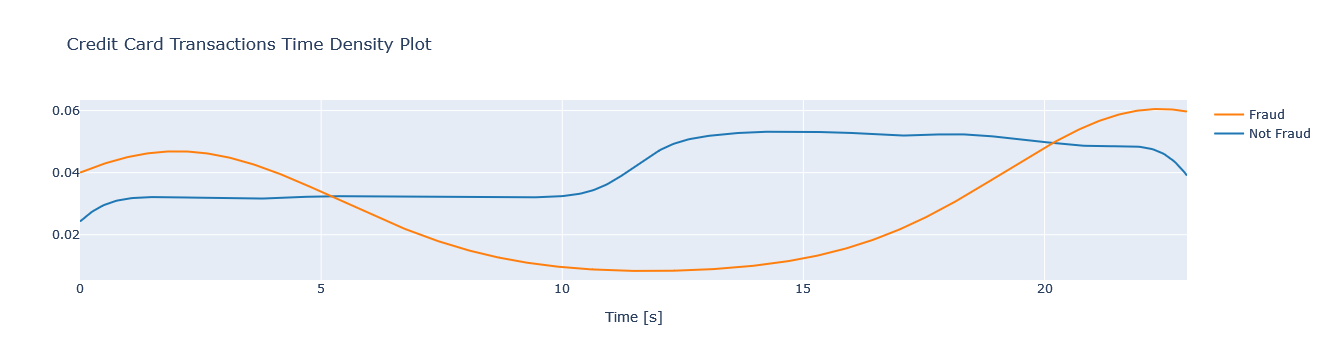

In [51]:
class_0 = df.loc[df['is_fraud'] == 0]["hour"]
class_1 = df.loc[df['is_fraud'] == 1]["hour"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))

iplot(fig, filename='dist_only')

Hovering over the graph we can conclude that the maximum fraud occurs at around 10 pm (22:00)

<AxesSubplot:xlabel='hour', ylabel='amt'>

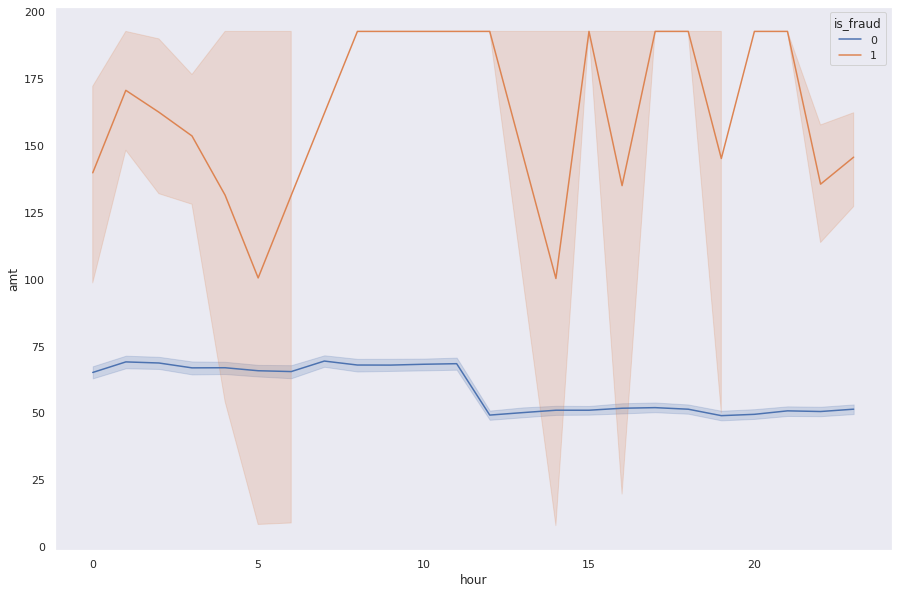

In [52]:
sns.lineplot(data=df, x='hour', y='amt',hue='is_fraud')

## 5. Data Preparation

### 5.1 Label Encoding

In [53]:
def label_encoding(col):
    label_encoder = LabelEncoder()
    df[col]= label_encoder.fit_transform(df[col])
    df[col].unique()

In [54]:
for i in cat_col:
    label_encoding(i)

In [55]:
df.head()

cc_num  merchant  category    amt  gender  city  state    zip  \
0  2.291164e+15       319        10   2.86       1   157     39  29209   
1  3.573030e+15       591        10  29.84       0    16     43  84002   
2  3.598215e+15       611         5  41.28       0    61     33  11710   
3  3.591920e+15       222         9  60.05       1   755      8  32780   
4  3.526826e+15       292        13   3.19       1   246     21  49632   

       lat      long  city_pop  job        dob   unix_time  merch_lat  \
0  33.9659  -80.9355   48101.0  275 1968-03-19  1371816865  33.986391   
1  40.3207 -110.4360     302.0  391 1990-01-17  1371816873  39.450498   
2  40.6729  -73.5365   34496.0  259 1970-10-21  1371816893  40.495810   
3  28.5697  -80.8191   48101.0  406 1987-07-25  1371816915  28.812398   
4  44.2529  -85.0170    1126.0  196 1955-07-06  1371816917  44.959148   

   merch_long  is_fraud           Date_time        Date      Time  hour   age  
0  -81.200714         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  54.0  
1 -109.960431         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  32.0  
2  -74.196111         0 2020-06-21 12:14:00  2020-06-21  12:14:00    12  52.0  
3  -80.883061         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  35.0  
4  -85.884734         0 2020-06-21 12:15:00  2020-06-21  12:15:00    12  67.0

### 5.2 Splitting Dataset

In [56]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Date_time', 'Date', 'Time',
       'hour', 'age'],
      dtype='object')

In [57]:
 # Removing date, time as SMOTE works with numnerical data only
df = df.drop(['Date_time','Date','Time','dob'],axis=1)
X = df.drop('is_fraud', axis=1)
Y = df['is_fraud']

In [58]:
# To have same rows in train and test data always 
np.random.seed(12)

#  Dividing the dataset into 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y, train_size=0.7, test_size=0.3, random_state=20)

### 5.3 Oversampling using SMOTE

In [59]:
df.dtypes

cc_num        float64
merchant        int64
category        int64
amt           float64
gender          int64
city            int64
state           int64
zip             int64
lat           float64
long          float64
city_pop      float64
job             int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
hour            int64
age           float64
dtype: object

In [60]:
# applying ovesampling technique on train data 
# as we do not want to change the test data
smote = SMOTE(random_state = 12)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [61]:
X_train.head().T

0             1             2             3  \
cc_num      6.011603e+15  1.130358e+16  3.017599e+13  3.561213e+15   
merchant    3.100000e+02  4.890000e+02  5.600000e+01  1.380000e+02   
category    1.200000e+01  1.000000e+01  0.000000e+00  5.000000e+00   
amt         2.200000e+00  4.635000e+01  2.686000e+01  4.533000e+01   
gender      1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
city        4.790000e+02  7.680000e+02  8.290000e+02  1.790000e+02   
state       9.000000e+00  3.700000e+01  2.200000e+01  1.000000e+00   
zip         3.025700e+04  1.548400e+04  5.659200e+04  3.685300e+04   
lat         3.314100e+01  3.989360e+01  4.753750e+01  3.282240e+01   
long       -8.417590e+01 -7.978560e+01 -9.599410e+01 -8.577040e+01   
city_pop    4.138000e+03  3.280000e+02  5.160000e+02  8.269000e+03   
job         1.840000e+02  4.650000e+02  2.600000e+01  2.850000e+02   
unix_time   1.372388e+09  1.371853e+09  1.373380e+09  1.372019e+09   
merch_lat   3.323403e+01  4.063047e+01  4.745704e+01  3.333907e+01   
merch_long -8.490684e+01 -8.014591e+01 -9.526735e+01 -8.560690e+01   
hour        2.000000e+00  2.200000e+01  1.400000e+01  2.000000e+01   
age         5.300000e+01  3.900000e+01  5.600000e+01  4.500000e+01   

                       4  
cc_num      3.788580e+14  
merchant    4.090000e+02  
category    1.200000e+01  
amt         1.150000e+00  
gender      0.000000e+00  
city        5.800000e+02  
state       3.000000e+00  
zip         8.525300e+04  
lat         3.354940e+01  
long       -1.119565e+02  
city_pop    1.704700e+04  
job         5.100000e+01  
unix_time   1.372649e+09  
merch_lat   3.338912e+01  
merch_long -1.120075e+02  
hour        3.000000e+00  
age         8.700000e+01

### 5.4 Feature Scaling

We are using normalization as our data does not follow Gaussian Distribution

In [62]:
scaler = MinMaxScaler() # as we have earlier seen that our data is not normally distributed
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col]  = scaler.fit_transform(X_test[num_col])

In [63]:
X_train.head()

cc_num  merchant  category       amt  gender  city  state       zip  \
0  0.531830       310        12  0.006264       1   479      9  0.294339   
1  1.000000       489        10  0.236722       0   768     37  0.144398   
2  0.002664        56         0  0.134986       0   829     22  0.561628   
3  0.315048       138         5  0.231398       1   179      1  0.361285   
4  0.033511       409        12  0.000783       0   580      3  0.852526   

        lat      long  city_pop  job  unix_time  merch_lat  merch_long  \
0  0.323009  0.698296  0.085590  184   0.310160  33.234028  -84.906842   
1  0.552786  0.779931  0.006344  465   0.019686  40.630466  -80.145908   
2  0.812892  0.478545  0.010254   26   0.849025  47.457044  -95.267355   
3  0.312167  0.668648  0.171513  285   0.109967  33.339066  -85.606896   
4  0.336906  0.181736  0.354091   51   0.452035  33.389116 -112.007464   

       hour       age  
0  0.086957  0.461538  
1  0.956522  0.282051  
2  0.608696  0.500000  
3  0.869565  0.358974  
4  0.130435  0.897436

<AxesSubplot:>

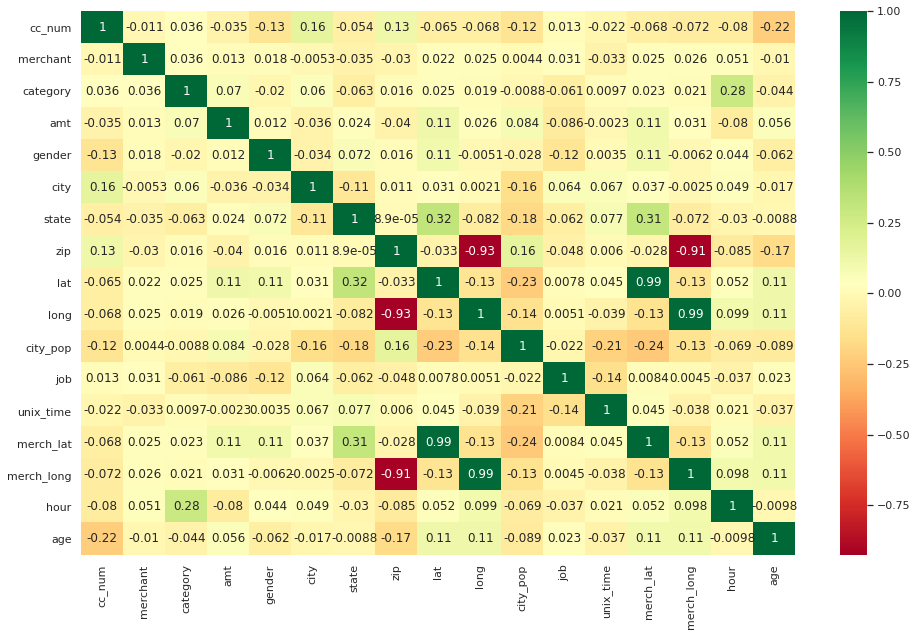

In [64]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(), annot=True, cmap='RdYlGn')

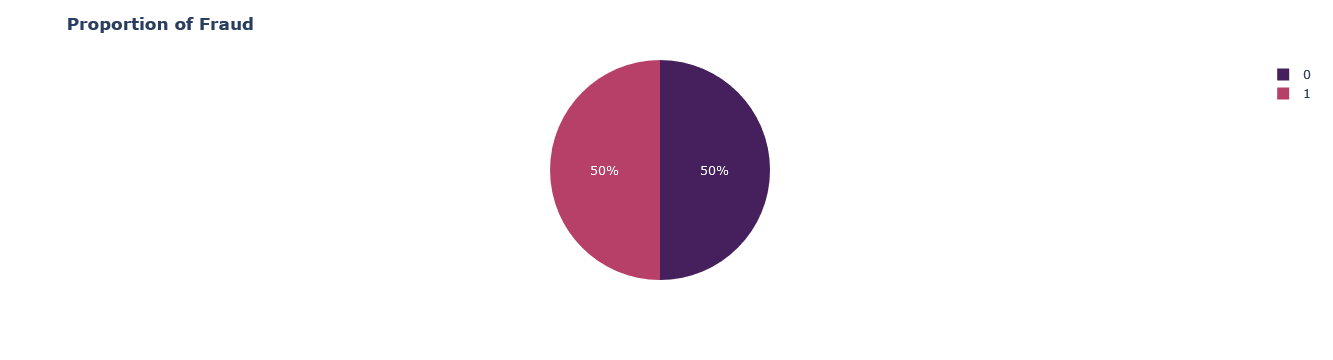

In [65]:
df2=pd.DataFrame(y_train,columns=['is_fraud'])
fig=px.pie(df2,names='is_fraud',color_discrete_sequence=['#46205c', '#b74068']) 
fig.update_layout(title='<b>Proportion of Fraud<b> ')
fig.show() 

Now the oversampling has been done

## 6. Model Building

### Defining Evalution Metrics calculation function

In [66]:
# Function to calculate accuracy
def metric_report(model, name, y_pred):
      
    cm = confusion_matrix(y_test, y_pred) 
    
    fig, ax = plt.subplots(2, figsize=(10,12))
    sns.heatmap(cm, annot=True, fmt='g', cmap="crest", ax=ax[0])
    ax[0].set_title("Confusion matrix")
    ax[0].set_xlabel('Predicted labels')
    ax[0].set_ylabel('True labels');
    ax[0].xaxis.set_ticklabels(['No', 'Yes'])
    ax[0].yaxis.set_ticklabels(['Yes', 'No'])
#     fig.delaxes(ax[1])
    
    acc = accuracy_score(y_test,y_pred)*100
    
    print("Metrics Report : \n",
    classification_report(y_test, y_pred))
    
    y_pred_prob = model.predict_proba(X_test)[::,1]
    fpr, tpr, thre = roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), 
         xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()
    
    return acc

In [67]:
def plot_roc(model, name):
    
    y_pred_prob = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, thre = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), 
         xytext=(0.6, 0.3),arrowprops=dict(facecolor='#6E726D', shrink=0.05),)
    plt.legend()

In [68]:
accuracies = {}

In [69]:
# Function to make predictions
def make_prediction(X_test, model):
    y_pred = model.predict(X_test)
    return y_pred

In [70]:
models=[]

#### 6.1 Logistic Regression

Metrics Report : 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91     18351
           1       0.02      0.72      0.04        76

    accuracy                           0.84     18427
   macro avg       0.51      0.78      0.47     18427
weighted avg       0.99      0.84      0.91     18427

Test Accuracy of Logistic Regression Algorithm: 84.06%


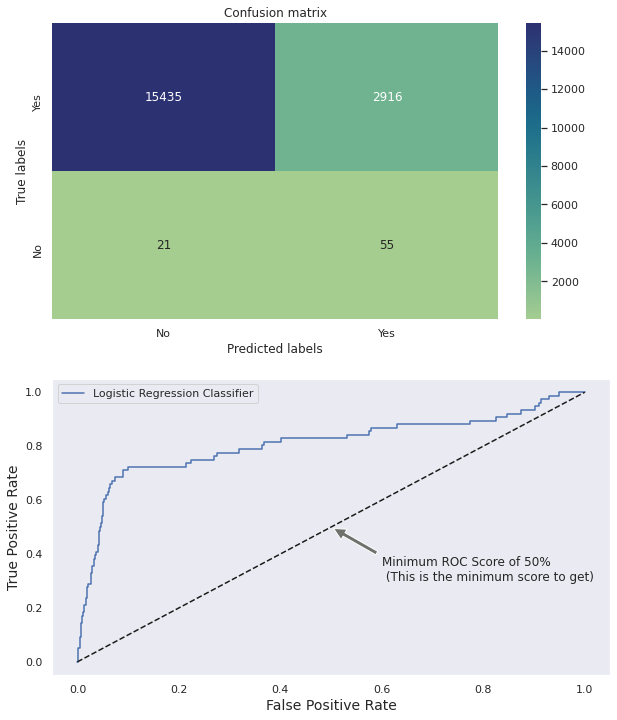

In [71]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = make_prediction(X_test, lr)

LRacc = metric_report(lr, 'Logistic Regression Classifier', y_pred)
# y_pred_prob = lr.predict_proba(X_test)[::,1]
# plot_roc(lr, 'Logistic Regression Classifier')
models.append(lr)

accuracies['Logistic Regression'] = LRacc

print("Test Accuracy of Logistic Regression Algorithm: {:.2f}%".format(LRacc))

#### 6.3 KNN Classifier

Metrics Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     18351
           1       0.06      0.76      0.11        76

    accuracy                           0.95     18427
   macro avg       0.53      0.86      0.54     18427
weighted avg       1.00      0.95      0.97     18427

Test Accuracy of KNN Algorithm: 94.92%


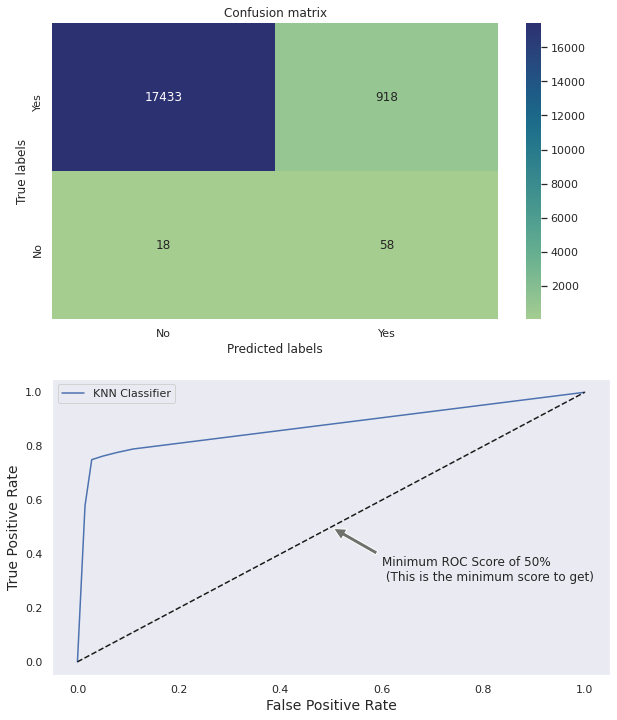

In [72]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

y_pred_knn = make_prediction(X_test, knn)

KNNacc = metric_report(knn, 'KNN Classifier', y_pred_knn)

accuracies['KNN'] = KNNacc

print("Test Accuracy of KNN Algorithm: {:.2f}%".format(KNNacc))

#### 6.4 Decision Tree

#### 6.4.1 using Gini index

In [73]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    dt_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 12,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    dt_gini.fit(X_train, y_train)
    return dt_gini

Results Using Gini Index:
Metrics Report : 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90     18351
           1       0.02      0.78      0.03        76

    accuracy                           0.82     18427
   macro avg       0.51      0.80      0.47     18427
weighted avg       0.99      0.82      0.90     18427

Test Accuracy of Decision Tree using gini index: 82.23%


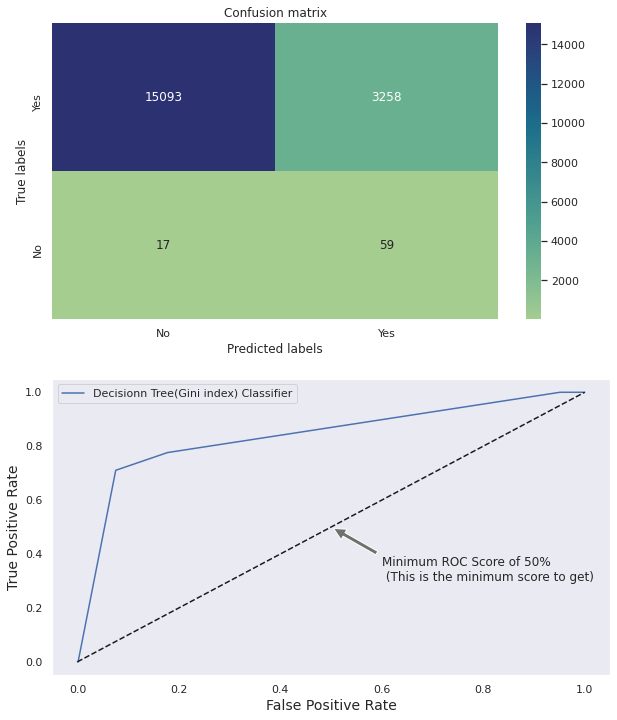

In [74]:
dt_gini = train_using_gini(X_train, X_test, y_train)
print("Results Using Gini Index:")
  
# Prediction using gini
y_pred_gini = make_prediction(X_test, dt_gini)

giniAcc = metric_report(dt_gini,'Decisionn Tree(Gini index) Classifier', y_pred_gini)

accuracies['DT by gini']=giniAcc

print("Test Accuracy of Decision Tree using gini index: {:.2f}%".format(giniAcc))

#### 6.4.2 using Entropy

In [75]:
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    dt_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 12,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    dt_entropy.fit(X_train, y_train)
    return dt_entropy

Results Using Entropy:
Metrics Report : 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90     18351
           1       0.02      0.78      0.03        76

    accuracy                           0.82     18427
   macro avg       0.51      0.80      0.47     18427
weighted avg       0.99      0.82      0.90     18427

Test Accuracy of Decision Tree by Entropy: 81.91%


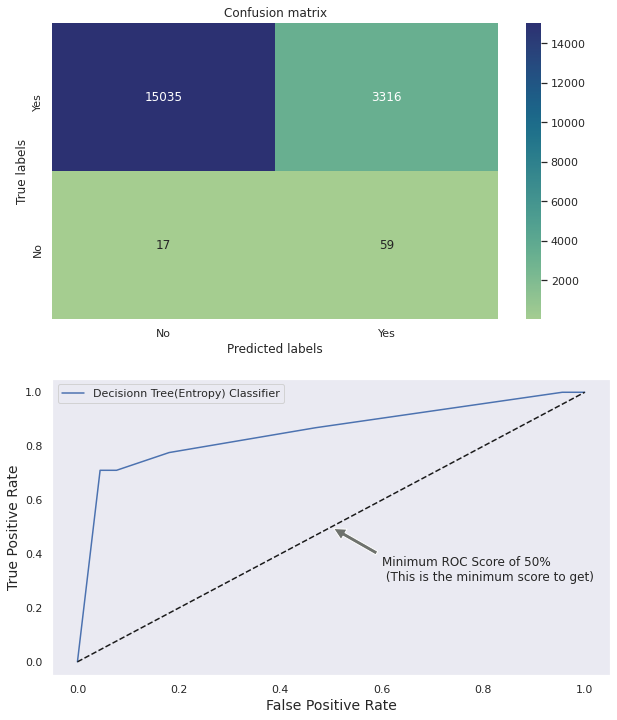

In [76]:
dt_entropy = train_using_entropy(X_train, X_test, y_train)


# Prediction using entropy
y_pred_entropy = make_prediction(X_test, dt_entropy)

print("Results Using Entropy:")
entAcc = metric_report(dt_entropy,'Decisionn Tree(Entropy) Classifier', y_pred_entropy)

accuracies['DT by entropy']=entAcc

print("Test Accuracy of Decision Tree by Entropy: {:.2f}%".format(entAcc))

#### 6.5 Random Forest

Metrics Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18351
           1       0.69      0.63      0.66        76

    accuracy                           1.00     18427
   macro avg       0.84      0.82      0.83     18427
weighted avg       1.00      1.00      1.00     18427

Test Accuracy of Random Forest Algorithm: 99.73%


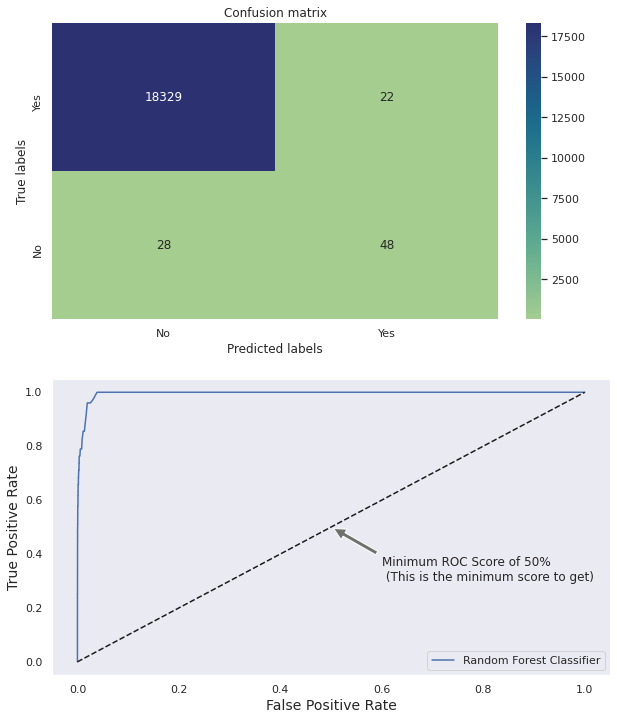

In [77]:
rf = RandomForestClassifier(n_estimators = 100) 
 

rf.fit(X_train, y_train)
 

y_pred_rf = make_prediction(X_test, rf)
 
RFacc = metric_report(rf, 'Random Forest Classifier', y_pred_rf)

accuracies['Random Forest ']= RFacc

print("Test Accuracy of Random Forest Algorithm: {:.2f}%".format(RFacc))

#### 6.2 Support Vector Classifier

In [78]:
# svc = SVC(random_state = 12)
# svc.fit(X_train, y_train)

# y_pred_svc = make_prediction(y_test, svc)

# SVCacc = metric_report(svc, 'Support Vector Classifier', y_pred_svc)

# accuracies['SVC'] = SVCacc

# print("Test Accuracy of SVM Algorithm: {:.2f}%".format(SVCacc))

Plotting Accuracy of different models

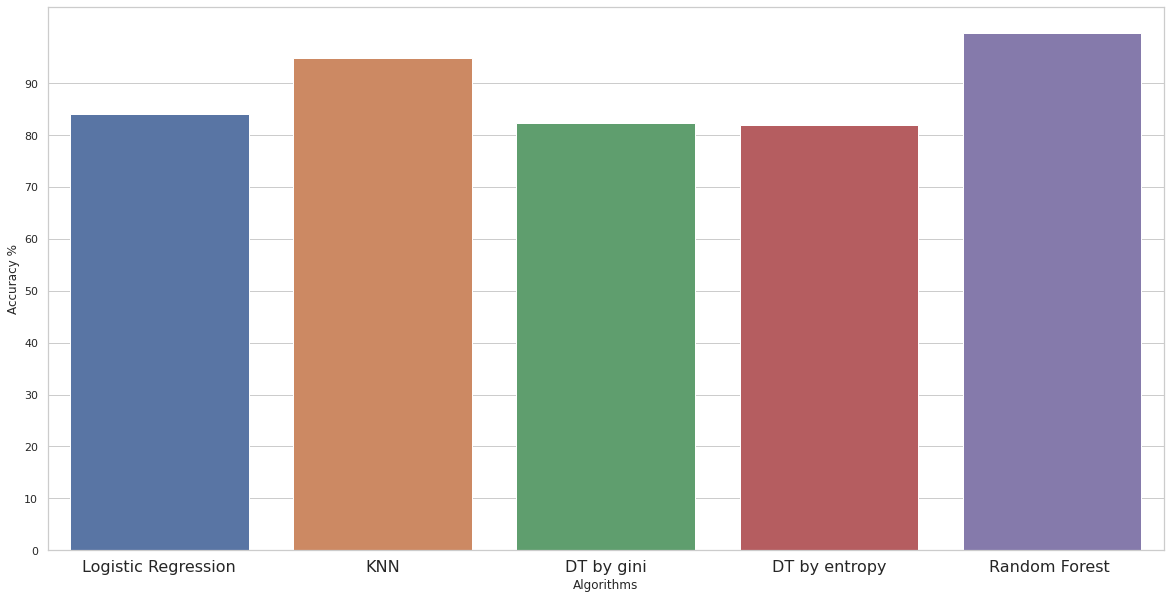

In [79]:
colors = ["purple", "green", "orange", "magenta","#CFC60E",'blue','brown']
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.xticks(fontsize= 16)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()